### Colab Activity 13.1: Binary Classification with Regressionn 

**Expected Time = 60 minutes** 


This activity motivates the later work with logistic regression.  To begin, you will build a linear regression model to solve a binary classification problem.  In order to use the model, you will have to determine a threshold for the single input feature.  Using this model you will determine its accuracy on a test set.   

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import seaborn as sns

### The Data

The dataset used in this activity is similar to that from the videos, containing body information on three different kinds of penguins in Antarctica.  The task is to differentiate between these classes using the body measurements, sex, and location data. 

In [2]:
penguins = sns.load_dataset('penguins').dropna()

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Text(0.5, 1.0, '')

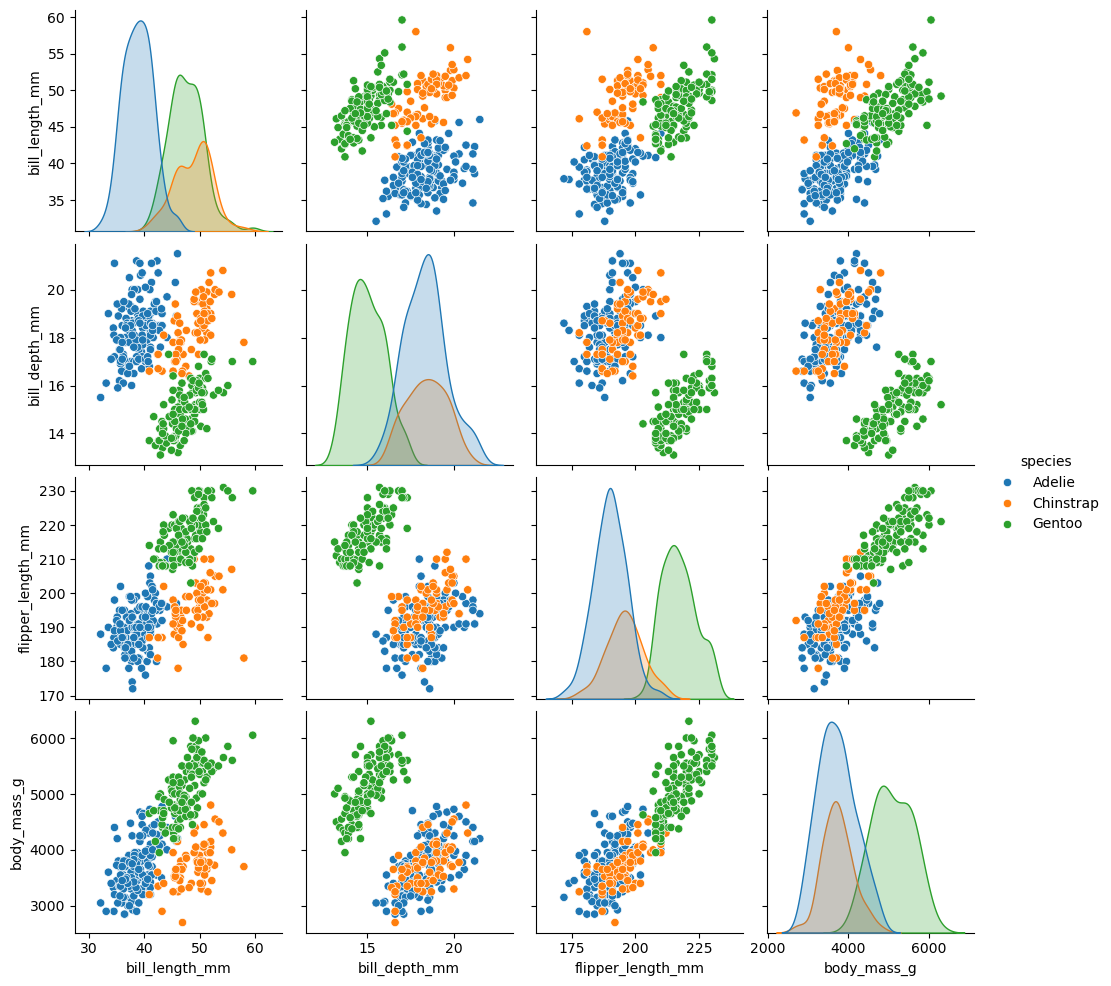

In [3]:
sns.pairplot(penguins, hue = 'species');
plt.title('')

[Back to top](#-Index)

### Problem 1

#### Binarizing the Problem



Use the function `loc()` on the `penguins` dataframe to subset only penguins belonging to `species` `Adelie` and `Gentoo`.  

Assign your DataFrame to `binary_penguins` below.  

In [4]:


binary_penguins = ''
binary_penguins = penguins.loc[penguins['species'].isin(['Adelie', 'Gentoo'])]


# Answer check
binary_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


[Back to top](#-Index)

### Problem 2

#### Building a Regression Model



<center>
    <img src = 'images/lr.png'/>
</center>

In this question, you will instantiate a linear regression model.

To begin, assign the `flipper_length_mm` column of the `penguis` dataframe to the variable `X`. Next, assign a numeric representation of the `species` column with `Adelie` = 0 and `Gentoo` = 1 to the variable `y`.  

Finally, instantiate a linear regression model to the variable `lr_flipped` and fit it to the variable `X` and `y`.

HINT: To create the binary numeric values for `y`, use the function `.map()`.

In [5]:


X = ''
y = ''
lr_flipper = ''

# Extract feature X (flipper length) and reshape for sklearn
X = binary_penguins['flipper_length_mm'].values.reshape(-1, 1)

# Create binary labels (0 for Adelie, 1 for Gentoo)
y = binary_penguins['species'].map({'Adelie': 0, 'Gentoo': 1})

# Create and fit linear regression model
lr_flipper = LinearRegression()
lr_flipper.fit(X, y)

# Answer check
print(lr_flipper)

LinearRegression()


[Back to top](#-Index)

### Problem 3

#### Coeficients and Threshold



<center>
    <img src = 'images/thresh.png'/>
</center>

The idea here is to use `.5` to calculate the threshold for classification.  So if

$$P(Gentoo) = \beta_0 + \beta_1*X,$$

the threshold would be determined by 

$$\text{threshold} =  \frac{0.5 - \beta_0 }{\beta_1}.$$

Determine the value of the threshold using the coefficients derived from your `lr_flipper` model in the prvious question.  Assign it as a float to `threshold` below.

In [6]:


threshold = ''
threshold = (0.5 - lr_flipper.intercept_) / lr_flipper.coef_[0]

# Answer check
print(threshold)



203.992193482831


[Back to top](#-Index)

### Problem 4

#### Making predictions with the model



An option to make predictions, would be to evaluate the flipper length using the linear model. If the predicted value of the flipper length is greater than or equal to the threshold predict 1, otherwise predict 0.  

Below, complete the function `linear_preds` to make these predictions. 



In [7]:


def linear_preds(X, threshold, model):
    """Creates predictions using a model based on >= threshold on
    array X.

    Arguments
    ---------
    X: Input Array (N, 1)
    y: threshold
       float for which threshold >= 0.5 will predict 1
    model: scikitlearn model with .coef_ and .intercept_

    Returns
    -------
    numpy.array of 0 and 1 based on prediction threshold
    """
    # Get raw predictions from model
    predictions = model.predict(X)
    # Convert to binary predictions based on threshold
    return (predictions >= threshold).astype(int)



# Answer check
preds = linear_preds(X, 0.5, lr_flipper)
print(preds[:5])

[0 0 0 0 0]


[Back to top](#-Index)

### Problem 5

#### Evaluating the accuracy of the model



In the code cell below, determine the accuracy of your linear model by comparing the values of `preds` and `y`. 


Assign your value as a float to `linear_acc` below. 

HINT: Use the function `ravel()` on the `preds` to flatten the array.

In [8]:


linear_acc = ''

# Calculate accuracy by comparing predictions with actual values
linear_acc = (preds.ravel() == y).mean()

# Answer check
print(linear_acc)

0.9849056603773585


### Summary of Binary Classification with Regression Activity

This notebook demonstrates using linear regression for binary classification, specifically distinguishing between Adelie and Gentoo penguins based on flipper length.

**Key Steps & Concepts:**

1. **Data Preparation**
   - Filtered penguin dataset to focus on two species (Adelie and Gentoo)
   - Used flipper length as the predictor variable
   - Encoded species as binary values (0 for Adelie, 1 for Gentoo)

2. **Model Implementation**
   - Built a simple linear regression model
   - Used the equation: P(Gentoo) = β₀ + β₁X
   - Calculated classification threshold using: threshold = (0.5 - β₀) / β₁

3. **Prediction & Evaluation**
   - Implemented binary prediction based on threshold
   - Evaluated model accuracy by comparing predictions with actual labels

**Key Takeaways:**
- Linear regression can be adapted for binary classification problems
- The approach uses a threshold (0.5) to convert continuous predictions into binary outcomes
- This serves as a foundation for understanding more sophisticated classification methods like logistic regression
- The method demonstrates how a simple linear model can perform binary classification tasks, though it may not be optimal compared to dedicated classification algorithms